In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/advertising.csv')

print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [13]:
!pip install seaborn matplotlib pandas


<Axes: xlabel='TV', ylabel='Sales'>

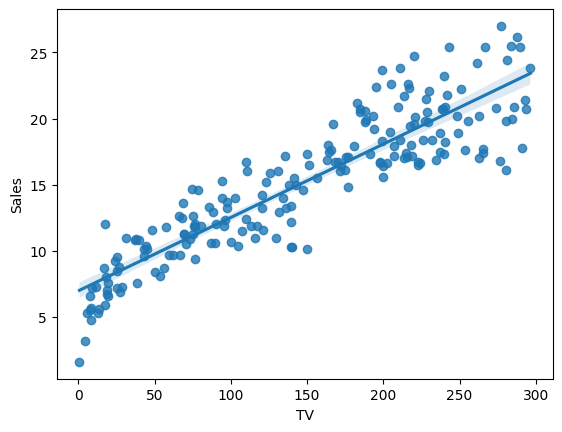

In [14]:
import seaborn as sns

sns.regplot(x='TV', y='Sales', data=df)

In [15]:
from sklearn.linear_model import LinearRegression


X = df[['TV']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [17]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 6.10
R² Score: 0.80


In [18]:
tv_data = pd.DataFrame({'TV': [50]})

predicted = model.predict(tv_data)

print('Prediction:', predicted)


Prediction: [9.78125562]


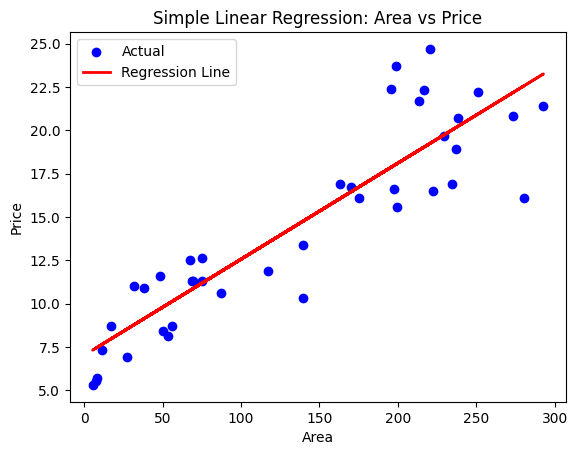

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Housing.csv")


print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
features = ['area', 'bedrooms', 'bathrooms', 'parking']
X = df[features]
y = df['price']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coeff_df)


Mean Squared Error: 2608333790562.2754
R² Score: 0.48396527035294856
            Coefficient
area       3.070804e+02
bedrooms   3.419436e+05
bathrooms  1.356851e+06
parking    3.222240e+05


In [11]:
new_data = pd.DataFrame({
    'area': [2400],
    'bedrooms': [3],
    'bathrooms': [2],
    'parking': [1]
})
predicted_price = model.predict(new_data)
print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 4972003.515541648
